In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [230]:
df=pd.read_csv('/content/AAPL (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-13,77.910004,79.267502,77.787498,79.239998,78.561531,121532000
1,2020-01-14,79.175003,79.392502,78.042503,78.169998,77.500702,161954400
2,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600
3,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200
4,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400
...,...,...,...,...,...,...,...
248,2021-01-06,127.720001,131.050003,126.379997,126.599998,126.599998,155088000
249,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.919998,109578200
250,2021-01-08,132.429993,132.630005,130.229996,132.050003,132.050003,105158200
251,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900


In [231]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [232]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [233]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,96.781917,98.195860,95.381719,96.841106,96.555759,1.487647e+08
std,22.451754,22.533056,22.030659,22.259124,22.403894,7.610504e+07
min,57.020000,57.125000,53.152500,56.092499,55.744217,2.256430e+07
25%,78.292503,79.267502,77.625000,78.262497,77.776558,1.005660e+08
50%,94.187500,95.375000,93.712502,95.040001,94.705559,1.335680e+08
75%,116.970001,118.709999,115.260002,116.589996,116.399178,1.822744e+08
max,138.050003,138.789993,134.339996,136.690002,136.690002,4.268848e+08


In [234]:
df.astype({'Date': 'datetime64[ns]'}).dtypes 

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [235]:
df['Day_Perc_Change']=(df['Close'].pct_change()*100)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
0,2020-01-13,77.910004,79.267502,77.787498,79.239998,78.561531,121532000,NaN
1,2020-01-14,79.175003,79.392502,78.042503,78.169998,77.500702,161954400,-1.350328
2,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600,-0.428552
3,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200,1.252649
4,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400,1.107099
...,...,...,...,...,...,...,...,...
248,2021-01-06,127.720001,131.050003,126.379997,126.599998,126.599998,155088000,-3.366153
249,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.919998,109578200,3.412322
250,2021-01-08,132.429993,132.630005,130.229996,132.050003,132.050003,105158200,0.863126
251,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900,-2.324882


In [236]:
df['HL_PCT']=((df['High']-df['Low'])/df['Adj Close']*100)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,HL_PCT
0,2020-01-13,77.910004,79.267502,77.787498,79.239998,78.561531,121532000,NaN,1.883879
1,2020-01-14,79.175003,79.392502,78.042503,78.169998,77.500702,161954400,-1.350328,1.741918
2,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600,-0.428552,1.927602
3,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200,1.252649,1.155054
4,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400,1.107099,1.183538
...,...,...,...,...,...,...,...,...,...
248,2021-01-06,127.720001,131.050003,126.379997,126.599998,126.599998,155088000,-3.366153,3.688788
249,2021-01-07,128.360001,131.630005,127.860001,130.919998,130.919998,109578200,3.412322,2.879624
250,2021-01-08,132.429993,132.630005,130.229996,132.050003,132.050003,105158200,0.863126,1.817500
251,2021-01-11,129.190002,130.169998,128.500000,128.979996,128.979996,100620900,-2.324882,1.294773


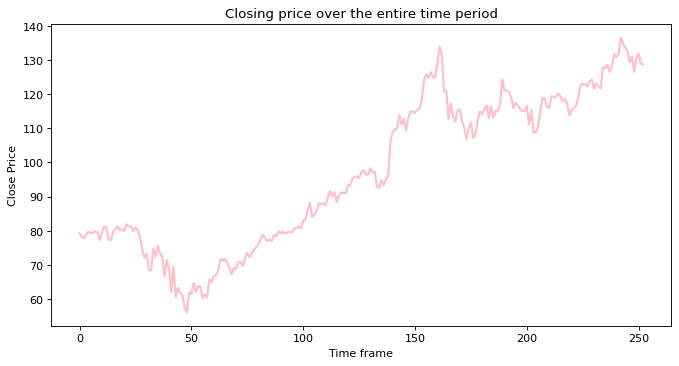

In [237]:
figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['Close'],color='pink',linewidth=2, markersize=5)
plt.ylabel('Close Price')
plt.xlabel('Time frame')
plt.title('Closing price over the entire time period')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


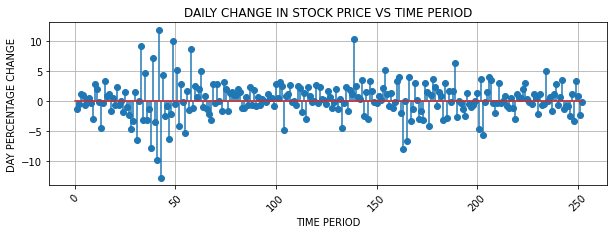

In [238]:
#a stem plot of the daily change in of the stock price in percentage.

figure(num=None, figsize=(10, 3))
plt.stem(df['Day_Perc_Change'])
plt.xticks(rotation=45)
plt.xlabel('TIME PERIOD')
plt.ylabel('DAY PERCENTAGE CHANGE')
plt.title('DAILY CHANGE IN STOCK PRICE VS TIME PERIOD')
plt.grid(True)

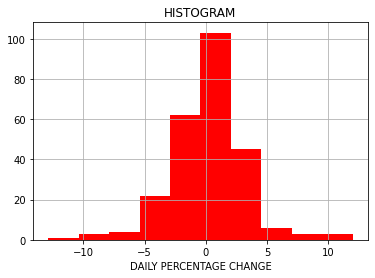

In [239]:
plt.title('HISTOGRAM')
plt.xlabel('DAILY PERCENTAGE CHANGE')
plt.hist(df['Day_Perc_Change'],linewidth=1,facecolor='red')
plt.grid(True)

In [240]:
import math
new=pd.DataFrame()
new= df[['Adj Close','Day_Perc_Change','HL_PCT','Volume']]
new.fillna(value=-99999, inplace=True)
new

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Adj Close,Day_Perc_Change,HL_PCT,Volume
0,78.561531,-99999.000000,1.883879,121532000
1,77.500702,-1.350328,1.741918,161954400
2,77.168564,-0.428552,1.927602,121923600
3,78.135223,1.252649,1.155054,108829200
4,79.000244,1.107099,1.183538,137816400
...,...,...,...,...
248,126.599998,-3.366153,3.688788,155088000
249,130.919998,3.412322,2.879624,109578200
250,132.050003,0.863126,1.817500,105158200
251,128.979996,-2.324882,1.294773,100620900


In [241]:
var1= int(math.ceil(0.01 * len(df)))
new['label'] = df['Adj Close'].shift(var1)
new.dropna(inplace=True)
new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj Close,Day_Perc_Change,HL_PCT,Volume,label
3,78.135223,1.252649,1.155054,108829200,78.561531
4,79.000244,1.107099,1.183538,137816400,77.500702
5,78.464882,-0.677691,0.962210,110843200,77.168564
6,78.744957,0.356952,0.850847,101832400,78.135223
7,79.124184,0.481586,1.235401,104472000,79.000244
...,...,...,...,...,...
248,126.599998,-3.366153,3.688788,155088000,132.690002
249,130.919998,3.412322,2.879624,109578200,129.410004
250,132.050003,0.863126,1.817500,105158200,131.009995
251,128.979996,-2.324882,1.294773,100620900,126.599998


USING LINEAR REGRESSION

In [242]:
#importing the needed libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [243]:
x = new[['Adj Close','Day_Perc_Change','HL_PCT','Volume']]
x = preprocessing.scale(x)
y = new['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [244]:
reg = LinearRegression()  
reg.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
y_pred = reg.predict(x)

In [246]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = new['label']
df_1['PREDICTED'] = y_pred
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
3,78.561531,75.656431
4,77.500702,76.072186
5,77.168564,76.989541
6,78.135223,76.591218
7,79.000244,77.346506
8,78.464882,77.630713
9,78.744957,77.393664
10,79.124184,75.232420
11,78.896149,76.341186
12,76.576187,79.039900


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


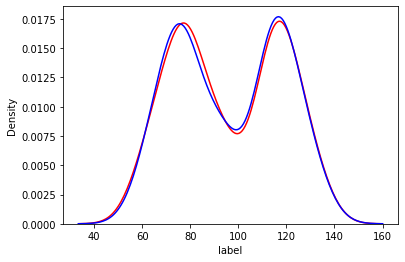

In [247]:
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [248]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

3.2258075336321643
0.9788665096776098


USING POLYNOMIAL REGRESSION

In [249]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [250]:
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train, y_train)  
predict=model.predict(x)

In [251]:
print("THE FIRST TEN PREDICTIONS ARE : ",end=" ")
df_1 = pd.DataFrame()
df_1['ACTUAL'] = y
df_1['PREDICTED'] = predict
df_1.head(10)

THE FIRST TEN PREDICTIONS ARE :  

,ACTUAL,PREDICTED
3,78.561531,76.645396
4,77.500702,77.492299
5,77.168564,78.270125
6,78.135223,77.780660
7,79.000244,78.121589
8,78.464882,78.574397
9,78.744957,78.394595
10,79.124184,76.271209
11,78.896149,77.338730
12,76.576187,79.811477


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


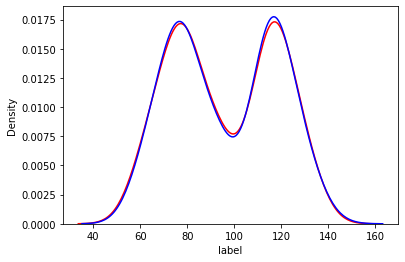

In [252]:
import seaborn as sns
ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value of Pred")
sns.distplot(predict, hist=False, color="b", label="Fitted Values of Pred" , ax=ax1)

In [253]:
rmse = np.sqrt(mean_squared_error(y,predict))
r2 = r2_score(y,predict)
print(rmse)
print(r2)

3.0483632310686715
0.9811275729721354
